In [ ]:
# AIML-5 : K-Mean and KNN

#### K-Mean

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
df.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [14]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
X= df[['Annual Income (k$)', 'Spending Score (1-100)']].values
print('Customers Data:')
print(X)

Customers Data:
[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58

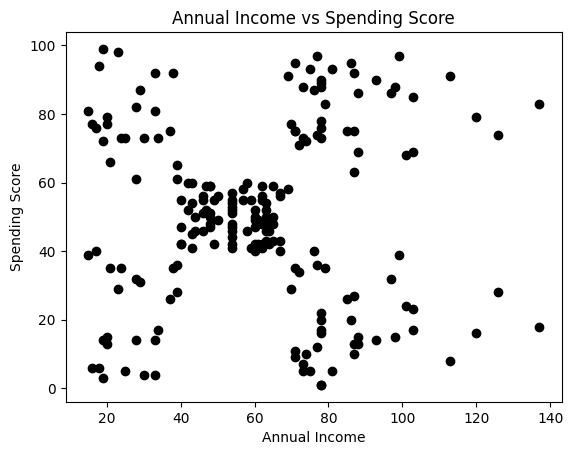

In [26]:
plt.scatter(X[:,0], X[:,1],c='black')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [27]:
# perform Kmeans clustering 
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [31]:
#get the centroids (centers points of clusters ) and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

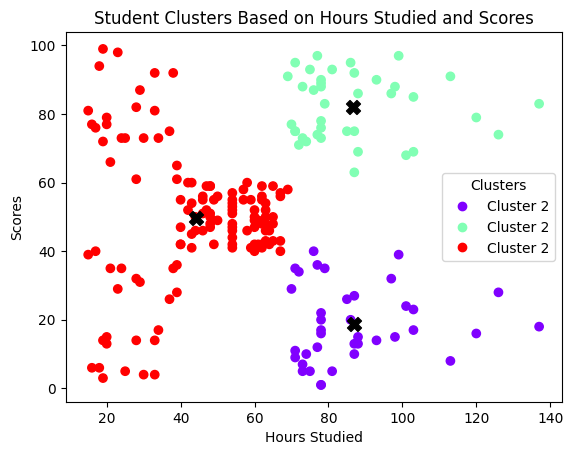

In [42]:
scatter =  plt.scatter (X[:, 0], X[:, 1], c= labels, cmap='rainbow') # Clustered, data points
plt.scatter(centroids [:, 0], centroids[:, 1], c='black', marker= 'X',s=100)

plt.title("Student Clusters Based on Hours Studied and Scores") # Plot title
plt.xlabel("Hours Studied") # X-azis label
plt.ylabel("Scores") # Y-azis label

#Create a legend
legend_labels = [f'Cluster {1+1}' for i in range(len(centroids))] 
legend = plt.legend(handles=scatter.legend_elements() [0], labels = legend_labels, title="Clusters")

plt.show()

#### K-Nearest Neighbors(KNN)

In [44]:
#K- Nearest Neighbors(KNN)
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier 

In [45]:
df = pd.read_csv('fruit_classification.csv')

In [46]:
df.head()

,Weight,Color,Diameter,Fruit_Type
0,150,0,7.5,apple
1,160,0,8.0,apple
2,170,0,7.8,apple
3,180,0,7.7,apple
4,155,0,7.6,apple


In [47]:
# Separate features (Weight, Color, Diameter) and labels (Fruit_Type)
X = df [['Weight', 'Color', 'Diameter']].values 
y = df ['Fruit_Type'].values

In [48]:
print("Fruit Data (Features):")
print(X)
print("Fruit Type (Labels):")
print(y)

Fruit Data (Features):
[[150.    0.    7.5]
 [160.    0.    8. ]
 [170.    0.    7.8]
 [180.    0.    7.7]
 [155.    0.    7.6]
 [130.    1.    6.8]
 [140.    1.    7. ]
 [120.    1.    6.5]
 [125.    1.    6.3]
 [135.    1.    6.9]
 [200.    2.    9. ]
 [210.    2.    9.2]
 [220.    2.    9.5]
 [215.    2.    9.3]
 [225.    2.    9.7]
 [145.    0.    7.4]
 [155.    0.    7.8]
 [165.    0.    8.1]
 [175.    0.    8.2]
 [185.    0.    8.3]
 [125.    1.    6.4]
 [140.    1.    6.8]
 [130.    1.    6.6]
 [185.    2.    8.9]
 [195.    2.    9. ]
 [205.    2.    9.2]
 [210.    2.    9.3]
 [190.    2.    8.7]
 [220.    2.    9.4]]
Fruit Type (Labels):
['apple' 'apple' 'apple' 'apple' 'apple' 'banana' 'banana' 'banana'
 'banana' 'banana' 'orange' 'orange' 'orange' 'orange' 'orange' 'apple'
 'apple' 'apple' 'apple' 'apple' 'banana' 'banana' 'banana' 'orange'
 'orange' 'orange' 'orange' 'orange' 'orange']


In [50]:
# Unknown fruit samples to predict (random example values)
unknown_fruit  = np.array([[160, 0, 7.6]]) # Example: Weight 160g, Color-Red (0), Diameter-7.6 cm
unknown_fruit1 =  np.array([[135, 2, 8.3]]) # Example: Weight-135g,u Color-Orange (2), Diameter-8.3 cm

In [54]:
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the Model
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [60]:
# Make Predictions for unknown fruits
prediction  =  knn.predict (unknown_fruit)
prediction1 =  knn.predict (unknown_fruit1)

print (f"The predicted fruit type for the unknown fruit is: {prediction[0]}")
print (f"The predicted fruit type for the second unknown fruit is: {prediction1[0]}")

The predicted fruit type for the unknown fruit is: apple
The predicted fruit type for the second unknown fruit is: banana


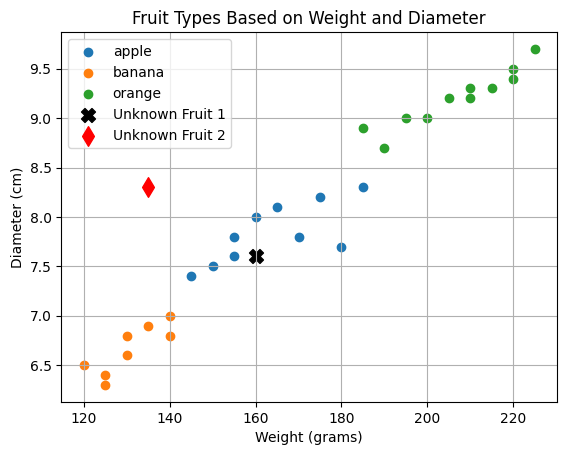

In [68]:
for fruit_type in np.unique(y):
    plt.scatter (X[y==fruit_type, 0], X[y==fruit_type, 2], label=fruit_type)

#Plot the unknown fruits with a different marker style and color
plt.scatter (unknown_fruit[0] [0], unknown_fruit [0] [2], label='Unknown Fruit 1', c='black', marker='X', s=100)
plt.scatter (unknown_fruit1 [0] [0], unknown_fruit1 [0] [2], label='Unknown Fruit 2', c='red', marker= 'd', s=100)
#Labels and title
plt.title("Fruit Types Based on Weight and Diameter")
plt.xlabel("Weight (grams)")
plt.ylabel("Diameter (cm)")
plt.legend()
plt.grid(True) # Optional: Show grid for better readability
plt.show()